In [1]:
## 2012-03-11_New goal model with neural network ##
## python 3.8 ##
## Sangil Lee ##

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/home/lscall/Dropbox/Ubuntu 18.04/Ubuntu_share/20210122-New Goal Model/experiment data/legacy data/original data/training1.csv', names=['Productivity', 'Efficiency', 'Utilization', 'Flexibility', 'Cost', 'Profits'], engine='python')
df.head()

,Productivity,Efficiency,Utilization,Flexibility,Cost,Profits
0,0.920574,0.326861,0.527807,0.203113,0.994426,1.306219
1,0.484593,0.108276,0.388172,0.465689,0.173284,1.358122
2,0.827789,0.865967,0.930056,0.558215,0.152119,2.302618
3,0.205889,0.216347,0.878902,0.329863,0.244587,0.734088
4,0.066839,0.429225,0.497779,0.009710,0.271564,0.806973


In [ ]:
sns.pairplot(df)

In [3]:
from sklearn.model_selection import train_test_split
X = df[['Productivity', 'Efficiency', 'Utilization', 'Flexibility', 'Cost']].values
y = df[['Profits']].values

In [4]:
X

array([[0.92057372, 0.32686065, 0.52780669, 0.20311267, 0.99442558],
       [0.48459348, 0.10827637, 0.38817224, 0.46568875, 0.17328433],
       [0.82778931, 0.86596672, 0.93005615, 0.55821538, 0.15211851],
       ...,
       [0.82168034, 0.93646112, 0.00314821, 0.00285173, 0.53982852],
       [0.52725431, 0.20996056, 0.42383289, 0.97799274, 0.69523369],
       [0.0615228 , 0.41083936, 0.49447771, 0.3243635 , 0.73257585]])

In [5]:
y

array([[1.30621905],
       [1.35812197],
       [2.30261753],
       [0.73408755],
       [0.80697254],
       [1.45932564],
       [0.56114984],
       [2.75565098],
       [3.10384657],
       [1.48691726],
       [1.52815826],
       [1.65006081],
       [1.97821227],
       [0.68075801],
       [1.39079598],
       [1.14289399],
       [2.01273323],
       [1.91872506],
       [0.95762171],
       [1.99657347],
       [0.6236477 ],
       [0.5965675 ],
       [2.40935148],
       [1.11875536],
       [1.17468912],
       [1.74266089],
       [1.61768786],
       [2.66357039],
       [2.10398569],
       [1.08494462],
       [1.91390064],
       [2.66113086],
       [1.20033323],
       [0.66082054],
       [0.48505627],
       [0.86428119],
       [2.61656154],
       [1.03243024],
       [2.60463279],
       [0.89947891],
       [1.04860881],
       [1.31851363],
       [1.15982243],
       [0.97981852],
       [1.98755327],
       [2.1132921 ],
       [1.50737365],
       [1.879

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [7]:
X_train.shape

(250, 5)

In [8]:
X_test.shape

(250, 5)

In [ ]:
## Normalization and fit the data ##

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

In [ ]:
## data transform ##

X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [9]:
## neual network model set up ##

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import models
from keras import layers
import keras.backend as K
from keras.utils.generic_utils import get_custom_objects

def gaussian(x):
    return K.exp(-K.pow(x,2))

get_custom_objects().update({'gaussian': Activation(gaussian)})

In [10]:
## neual network model layer ##
# create model

def get_model():
    
    model = Sequential([
        Dense(5, input_shape = (5,), activation = 'gaussian'),
        Dense(32, activation = 'gaussian'),
        Dense(64, activation = 'gaussian'),
        Dense(32, activation = 'gaussian'),
        Dense(5, activation = 'gaussian'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adam'
        )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 4,585
Trainable params: 4,585
Non-trainable params: 0
______________________________________________________

In [11]:
# Fit the model
model.fit(X_train, y_train, epochs = 1500)

Epoch 1/1500
8/8 [==============================] - 1s 5ms/step - loss: 3.0598
Epoch 2/1500
8/8 [==============================] - 0s 20ms/step - loss: 1.6654
Epoch 3/1500
8/8 [==============================] - 0s 6ms/step - loss: 1.1039
Epoch 4/1500
8/8 [==============================] - 0s 21ms/step - loss: 1.0271
Epoch 5/1500
8/8 [==============================] - 0s 17ms/step - loss: 1.0185
Epoch 6/1500
8/8 [==============================] - 0s 7ms/step - loss: 1.0044
Epoch 7/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.9582
Epoch 8/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.8843
Epoch 9/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.8289
Epoch 10/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.9172
Epoch 11/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.8686
Epoch 12/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.8329
Epoch 13/1500
8/8 [===========================

8/8 [==============================] - 0s 6ms/step - loss: 0.1780
Epoch 104/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.1485
Epoch 105/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.1519
Epoch 106/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.2029
Epoch 107/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.1883
Epoch 108/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.1777
Epoch 109/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.1838
Epoch 110/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 111/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.1667
Epoch 112/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.1420
Epoch 113/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.1565
Epoch 114/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.1476
Epoch 115/1500
8/8 [=======================

8/8 [==============================] - 0s 5ms/step - loss: 0.0427
Epoch 205/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0354
Epoch 206/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 207/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0429
Epoch 208/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 209/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 210/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0393
Epoch 211/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 212/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0406
Epoch 213/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0455
Epoch 214/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 215/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0321
Epoch 216/1500
8/8 [=======================

8/8 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 306/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 307/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 308/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 309/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 310/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 311/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 312/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 313/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0190
Epoch 314/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 315/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 316/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0182
Epoch 317/1500
8/8 [=======================

8/8 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 407/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 408/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 409/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 410/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 411/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 412/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 413/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 414/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 415/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 416/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 417/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 418/1500
8/8 [=======================

8/8 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 508/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 509/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 510/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 511/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 512/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 513/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 514/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 515/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 516/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 517/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 518/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 519/1500
8/8 [=======================

8/8 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 609/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 610/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 611/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 612/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 613/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 614/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 615/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 616/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 617/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 618/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 619/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 620/1500
8/8 [=======================

8/8 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 710/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 711/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 712/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 713/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 714/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 715/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 716/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 717/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 718/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 719/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 720/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 721/1500
8/8 [=======================

8/8 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 811/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 812/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 813/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 814/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 815/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 816/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 817/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 818/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 819/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 820/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 821/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 822/1500
8/8 [=======================

8/8 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 912/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 913/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 914/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 915/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 916/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 917/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 918/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 919/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 920/1500
8/8 [==============================] - 0s 16ms/step - loss: 0.0034
Epoch 921/1500
8/8 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 922/1500
8/8 [==============================] - 0s 21ms/step - loss: 0.0021
Epoch 923/1500
8/8 [====================

8/8 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 1013/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 1014/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1015/1500
8/8 [==============================] - ETA: 0s - loss: 0.002 - 0s 4ms/step - loss: 0.0023
Epoch 1016/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 1017/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 1018/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1019/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1020/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 1021/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1022/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1023/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 10

8/8 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1112/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1113/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1114/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1115/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 1116/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1117/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 1118/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1119/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1120/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1121/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 1122/1500
8/8 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 1123/1500
8/8 [==========

8/8 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 1212/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 1213/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 1214/1500
8/8 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 1215/1500
8/8 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 1216/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 1217/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 1218/1500
8/8 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 1219/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 1220/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1221/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 1222/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1223/1500
8/8 [======

Epoch 1311/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 1312/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1313/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 1314/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1315/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1316/1500
8/8 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 1317/1500
8/8 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 1318/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1319/1500
8/8 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1320/1500
8/8 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 1321/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 1322/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1323/1

8/8 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1411/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 1412/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1413/1500
8/8 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1414/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1415/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1416/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1417/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1418/1500
8/8 [==============================] - 0s 4ms/step - loss: 9.5014e-04
Epoch 1419/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1420/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1421/1500
8/8 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1422/1500
8/8 [=======

In [12]:
# Look at the training history
loss_df = pd.DataFrame(model.history.history['loss'])

<AxesSubplot:>

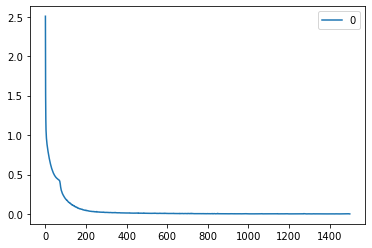

In [13]:
# Plot the losses
loss_df.plot()

In [14]:
# Model Evaluation
# Method 1
model.evaluate(X_test, y_test, verbose = 0)

0.0032026099506765604

In [15]:
model.evaluate(X_train, y_train, verbose = 0)

0.001801876351237297

In [16]:
test_predictions = model.predict(X_test)

In [17]:
test_predictions = pd.Series(test_predictions.reshape(250,))

In [18]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df

,Test True Y
0,0.948116
1,0.530321
2,0.425895
3,1.084945
4,1.488095
...,...
245,1.222807
246,0.901082
247,1.587339
248,0.990441


In [19]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df

,Test True Y,0
0,0.948116,0.984979
1,0.530321,0.517557
2,0.425895,0.381999
3,1.084945,1.132780
4,1.488095,1.531856
...,...,...
245,1.222807,1.352035
246,0.901082,0.862103
247,1.587339,1.584532
248,0.990441,1.027754


In [20]:
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df

,Test True Y,Model Predictions
0,0.948116,0.984979
1,0.530321,0.517557
2,0.425895,0.381999
3,1.084945,1.132780
4,1.488095,1.531856
...,...,...
245,1.222807,1.352035
246,0.901082,0.862103
247,1.587339,1.584532
248,0.990441,1.027754


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

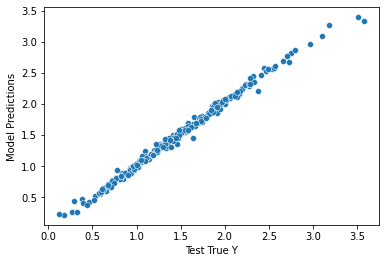

In [21]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data=pred_df)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.04293237013917285

In [24]:
df.describe()

,Productivity,Efficiency,Utilization,Flexibility,Cost,Profits
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.485033,0.502687,0.498929,0.511487,0.493451,1.437711
std,0.287185,0.298800,0.285695,0.294206,0.296256,0.638877
min,0.001588,0.000965,0.001264,0.002852,0.000454,0.120175
25%,0.227320,0.216063,0.247879,0.257727,0.228805,0.947447
50%,0.476073,0.496219,0.502359,0.535935,0.501299,1.374400
75%,0.732618,0.762582,0.742396,0.768167,0.746639,1.909524
max,0.998899,0.998522,0.998820,0.999955,0.998971,3.576721


In [25]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

0.0032026095417188745

In [26]:
preds = model.predict(X_test)

evals = model.evaluate(X_test, y_test)

print(evals)
print(preds[0:500])

8/8 [==============================] - 0s 2ms/step - loss: 0.0032
0.0032026099506765604
[[0.9849793 ]
 [0.5175569 ]
 [0.38199937]
 [1.1327804 ]
 [1.531856  ]
 [1.29018   ]
 [0.89245814]
 [1.1186073 ]
 [0.73742384]
 [0.6666397 ]
 [2.1148226 ]
 [2.571991  ]
 [1.8466568 ]
 [2.523529  ]
 [0.81461775]
 [1.5503517 ]
 [1.501484  ]
 [1.8537025 ]
 [1.3242418 ]
 [2.129635  ]
 [1.6456304 ]
 [0.42749226]
 [1.2351282 ]
 [1.3585032 ]
 [1.485663  ]
 [2.6901617 ]
 [2.0198638 ]
 [2.5666697 ]
 [1.3506567 ]
 [1.9642755 ]
 [1.1619818 ]
 [0.46078306]
 [2.2486463 ]
 [1.6356852 ]
 [1.3169677 ]
 [0.46718138]
 [1.768188  ]
 [1.3898009 ]
 [2.15383   ]
 [1.7951369 ]
 [0.8220218 ]
 [2.089152  ]
 [2.2335777 ]
 [1.6472725 ]
 [2.143116  ]
 [1.0994047 ]
 [0.5554144 ]
 [1.6085627 ]
 [1.5644428 ]
 [1.6260083 ]
 [1.1078881 ]
 [1.1642401 ]
 [0.97715217]
 [0.85944366]
 [2.2960932 ]
 [1.699441  ]
 [1.5925745 ]
 [1.7982936 ]
 [1.6187226 ]
 [1.2530665 ]
 [2.1846304 ]
 [3.0957932 ]
 [0.79803395]
 [1.9560223 ]
 [1.7063813 ]
 [

In [27]:
## change the input value which are initial value from machine learning

sample_dataset = tf.convert_to_tensor([[0.77062669827, 0.42065493431, 0.3, 0.37307360956, 0.3]])

predictions = model(sample_dataset)

print("predicted Answer : " ,  model.predict(sample_dataset))

predicted Answer :  [[1.8123281]]


In [33]:
## sample code to predict goal model value


sample_dataset = tf.convert_to_tensor([[0.695317852, 0.580114717, 0.3, 0.3, 0.3]])

predictions = model(sample_dataset)

print("predicted Answer : " ,  model.predict(sample_dataset))

predicted Answer :  [[1.889591]]


In [34]:
## sample code to predict goal model value


sample_dataset = tf.convert_to_tensor([[0.695317852, 0.580114717, 0.3, 0.3, 0.3]])

predictions = model(sample_dataset)

print("predicted Answer : " ,  model.predict(sample_dataset))

predicted Answer :  [[1.889591]]
